In [1]:
# 비지도 학습
# k- 평균 군집화
# 라이브러리 호출
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# 상품에 대한 연 지출 데이터(sales data.csv) 호출
data = pd.read_csv('./data/sales data.csv')
data.head()
# Channel : 고객 채널(호텔/레스토랑/카페) 또는 소매 채널(명목형 데이터)
# Region  : 고객 지역(명목형 데이터)
# Fresh   : 신선한 제품에 대한 연간 지출(연속형 데이터)
# Milk    : 유제품에 대한 연간 지출(연속형 데이터)
# Grocery : 식료품에 대한 연간 지출(연속형 데이터)
# Frozen  : 냉동 제품에 대한 연간 지출(연속형 데이터)
# Detergents_Paper : 세제 및 종이 제품에 대한 연간 지출(연속형 데이터)
# Delicassen : 조제 식품에 대한 연간 지출(연속형 데이터)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col) # 명목형 데이터를 판다스 get_dummies() 함수로 바이너리 데이터로 전환
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)        # inplace 옵션은 data 자체에서 처리
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [6]:
# 연속된 데이터의 모든 특성을 동일하게 중요성을 부여하기 위해서 스케일링(Scaling) 적용
# MinMaxScaler() 을 이용
mms = MinMaxScaler()    # MinMaxScaler() 객체 생성
mms.fit(data)           # MinMaxScaler() 객체에 데이터를 입력
data_transformed = mms.transform(data) # 데이터 변환

In [8]:
data_transformed[0:5]

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731, 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373, 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861, 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.11825445, 0.01553586, 0.04546385, 0.10484189, 0.01234568,
        0.03723404, 1.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.20162642, 0.07291369, 0.07755155, 0.063934  , 0.04345483,
        0.10809345, 0.        , 1.        , 0.        , 0.        ,
        1.        ]])

d:\tensorflow\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


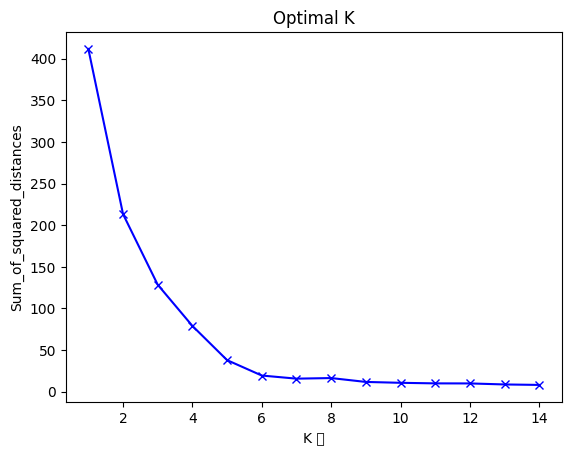

In [13]:
# 원하는 적당한 k값 구하기
Sum_of_squared_distances = []  # SSD(거리 제곱의 합)
K = range(1, 15)              # k값의 범위
for k in K:
    km = KMeans(n_clusters=k) # 1~ 15까지 K값 적용
    km = km.fit(data_transformed) # 데이터 학습
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-') # 그래프 생성
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal K')
plt.show()

In [ ]:
# K=5 일 때, 군집화가 가장 적절하다고 판단
# Sum of Squared Distances(SSD: 거리제곱의 합)은 출력 그래프에서 확인할 수 있듯
# k의 값이 n 만큼 커지면, 0과 같아지기 시작함
# 때문에 , 무한히 0에 가까워지기시작하는 값 직전이 최적으로 판단해서 5가 최적값으로 판단함

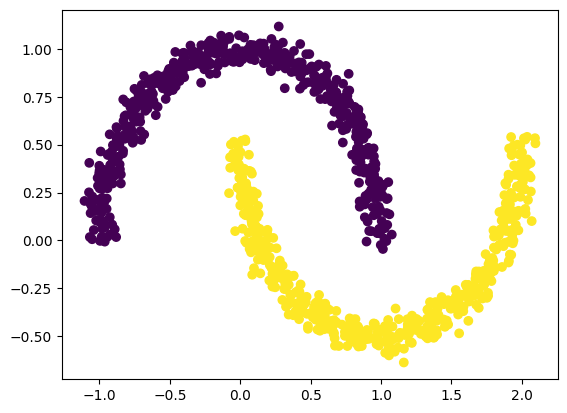

In [29]:
#DBSCAN을 이용한 밀도 기반 클러스터
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

x, y = make_moons(n_samples=1000, noise=0.05)

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(x)
plt.scatter(x[:,0], x[:,1], c = dbscan.labels_)
plt.show()

In [44]:
# 밀도기반 및 PCA를 이용한 분석
# 클러스터링이 목적... PCA는 보기..
# 라이브러리
# 데이터 처리
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# 데이터 분석- 머신러닝 라이브러리
from sklearn.cluster import DBSCAN # 밀도 기반 군집
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


In [35]:
# 데이터 로딩 및 결측치 처리..
X = pd.read_csv('./data/credit card.csv')
# X.head()
# X.info()

X =X.drop('CUST_ID', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [38]:
# 결측치 작업
X.fillna(method='ffill', inplace=True)
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

C:\Users\Admin\AppData\Local\Temp\ipykernel_15904\1887699545.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [45]:
# 데이터 전처리 작업 및 차원 축소 진행
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X) # 평균이 0, 표준편차가 1이 되도록 데이터 크기를 조정

X_normalized = normalize(X_scaler) # 데이터가 가우스 분포를 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized) # 넘파일 배열을 데이터프레임(dataframe)으로 변환

In [46]:
X_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146906,0.103137,-0.066350,-0.071056,-0.026406,-0.092925,0.252792,-0.135103,0.234873,-0.134444,-0.094773,-0.069757,-0.191193,-0.096793,-0.068374,0.235693,-0.820733
8946,-0.151150,0.105477,-0.067009,-0.072668,-0.025006,-0.095033,0.258527,-0.138169,0.240202,-0.137494,-0.096923,-0.071340,-0.195531,-0.102486,-0.069925,-0.106997,-0.839354
8947,-0.156989,-0.039327,-0.085230,-0.075682,-0.062527,-0.098974,0.181198,-0.143898,0.161244,-0.143196,-0.100942,-0.082828,-0.203640,-0.120989,-0.069834,0.069801,-0.874162
8948,-0.154334,-0.038414,-0.097250,-0.073925,-0.094148,-0.093066,-0.253040,-0.140558,-0.189920,0.032626,-0.037901,-0.122568,-0.227375,-0.120236,-0.070536,0.068181,-0.853872


In [50]:
# 차원 축소
pca = PCA(n_components= 2) # 2차원으로 축소 선언
X_principal = pca.fit_transform(X_normalized) # 차원 축소 적용
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


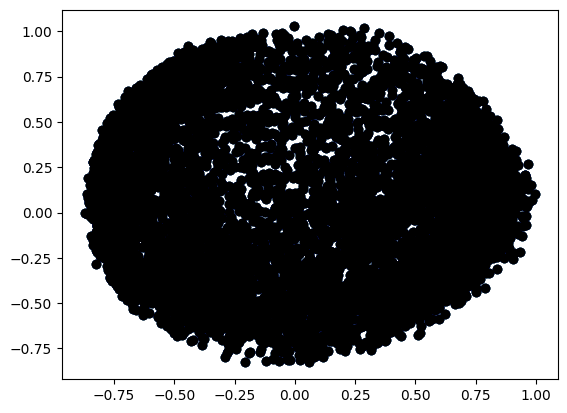

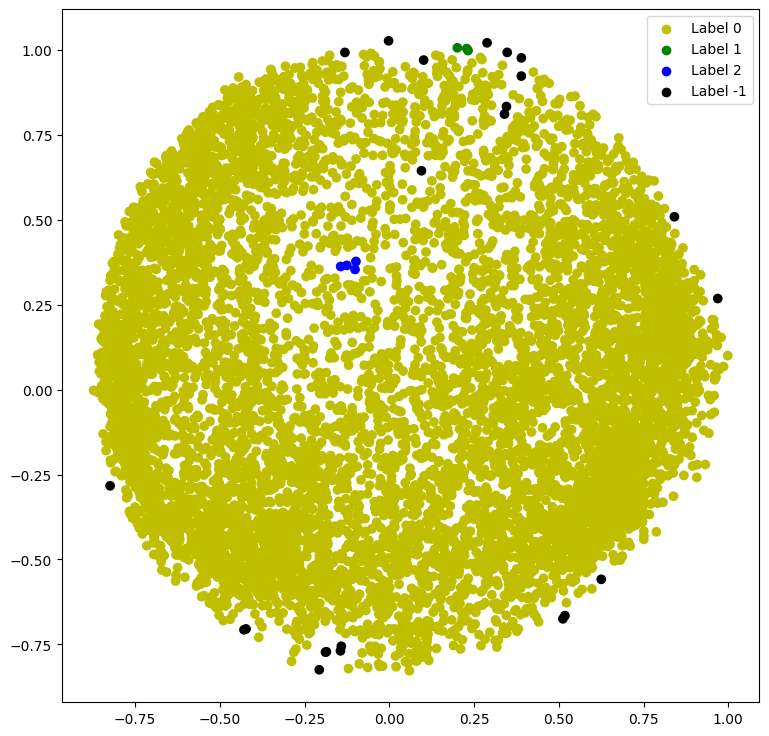

In [79]:
# 훈련된 모델을 시각화 하여 표현
# 밀도기반 클러스터링 모델 생성
db_default = DBSCAN(eps = 0.0375, min_samples= 3).fit(X_principal) ## 모델 생성 및 훈련
## 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파일 배열을 labels에 저장
labels = db_default.labels_ 

# 출력 그래프를 이용하여 작업 진행
colours = {} # 출력 드래프의 색상을 위한 레이블을 생성
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# 각 데이터 포인터에 대한 색상 벡터 생성
cvec = [colours[label] for label in labels]

r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g')
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b')
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k')

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec) # 정의된 색상 벡터에 따라 X축에 P1, Y축에 P2플로팅
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) # 범례 구축
plt.show()





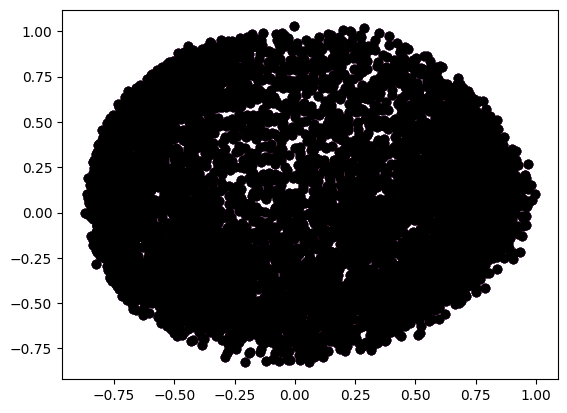

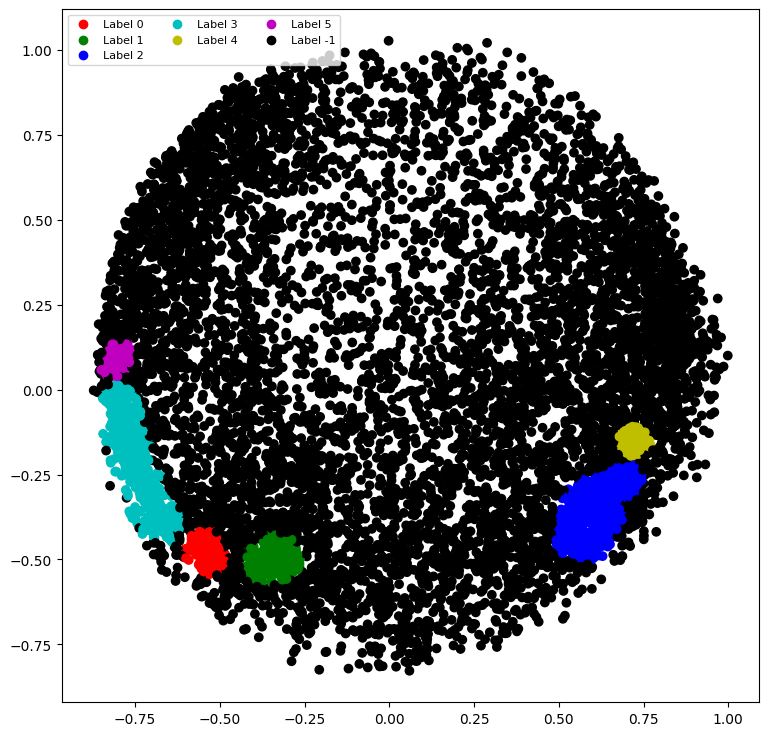

In [81]:
# 훈련된 모델을 시각화 하여 표현
# 밀도기반 클러스터링 모델 생성
db_default = DBSCAN(eps = 0.0375, min_samples= 50).fit(X_principal) ## 모델 생성 및 훈련

labels = db_default.labels_ ## 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파일 배열을 labels에 저장

# 출력 그래프를 이용하여 작업 진행
colours = {} # 출력 드래프의 색상을 위한 레이블을 생성
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'c'
colours[4] = 'y'
colours[5] = 'm'
colours[-1] = 'k'

# 각 데이터 포인터에 대한 색상 벡터 생성
# colours
cvec = [colours[label] for label in labels]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[6])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec) # 정의된 색상 벡터에 따라 X축에 P1, Y축에 P2플로팅
plt.legend((r, g, b, c, y ,m, k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3','Label 4','Label 5','Label -1'),
           scatterpoints = 1,
           loc = 'upper left',
           ncol = 3,
           fontsize = 8
           ) # 범례 구축
plt.show()


